## Data Cleaning

In [41]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

import datetime

In [42]:
transactions = pd.read_csv('./h-and-m-personalized-fashion-recommendations/transactions_train.csv')

In [43]:
transactions.shape

(31788324, 5)

In [44]:
# 날짜 형식 변환 및 중복제거
transactions['InvoiceDate'] = pd.to_datetime(transactions['t_dat'],format='%Y-%m-%d')
transactions=transactions[["InvoiceDate", "customer_id", "article_id", "price","sales_channel_id"]].drop_duplicates()

In [45]:
transactions.shape

(28813419, 5)

31,788,324개의 거래에서 중복 제거 후 28,813,419개의 거래로 줄었습니다.

In [46]:
transactions.head()

,InvoiceDate,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,685687004,0.016932,2


In [47]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28813419 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   InvoiceDate       datetime64[ns]
 1   customer_id       object        
 2   article_id        int64         
 3   price             float64       
 4   sales_channel_id  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.3+ GB


In [48]:
# unique customer ids in the transactions df 
len(transactions['customer_id'].unique())
unique_customers = transactions['customer_id'].unique().tolist()
len(unique_customers)


1362281

In [49]:
# unique article ids in the transactions df 
len(transactions['article_id'].unique())
unique_articles = transactions['article_id'].unique().tolist()


구매 이력이 있는 경우 1로, 그렇지 않은 경우 0으로 표시합니다. 

In [50]:
purchase_df = transactions[['customer_id', 'article_id']]
purchase_df['purchase'] = 1
purchase_df.reset_index()
purchase_df.head(3)

/var/folders/jq/3330kvm10vb5ssmqmyw5chym0000gn/T/ipykernel_28448/1323196547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_df['purchase'] = 1


,customer_id,article_id,purchase
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,663713001,1
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,541518023,1
2,00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,505221004,1


In [51]:
purchase_df.isna().sum()

customer_id    0
article_id     0
purchase       0
dtype: int64

In [52]:
purchase_df.head(1)

,customer_id,article_id,purchase
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,663713001,1


# RFM Analysis

고객의 최근 거래(2020년 3월 부터 마지막 거래일)의 최신성(Recency), 빈도(Frequency), 금전적 총액(Monetary)을 기준으로 고객을 정량적으로 등급 매기고 그룹화하였다.

In [53]:
transactions.head()

,InvoiceDate,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,685687004,0.016932,2


In [54]:
start_date = datetime.datetime(2020,3,1)
analysis_date=datetime.datetime(2020,9,23)

# Filter transactions by date
transactions["t_dat"] = pd.to_datetime(transactions["InvoiceDate"])
transactions = transactions.loc[transactions["t_dat"] >= start_date]

transactions['date']=transactions['InvoiceDate']
(analysis_date - transactions['InvoiceDate'].max()).days

1

In [55]:
rfm = transactions.groupby('customer_id').agg({
    'InvoiceDate': lambda x: (analysis_date - x.max()).days,
    'date': 'count',
    'price': 'sum'})

In [56]:
rfm.head()

,InvoiceDate,date,price
customer_id,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,18,6,0.144475
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,77,10,0.225254
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,8,9,0.413407
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,42,7,0.255814
0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a,9,2,0.076237


In [57]:
rfm.columns=["Recency","Frequency","Monetary"]
rfm = rfm[rfm["Monetary"] > 0] # 거래가 없거나 금전적 가치가 없는 데이터를 제거

In [58]:
#가장 최근 거래일에 가까운 고객에게 높은 점수(5)를, 가장 먼 고객에게 낮은 점수(1)를 부여
rfm["recency_score"] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
# 가장 거래 빈도가 낮은 고객에게 낮은 점수(1)를, 가장 높은 고객에게 높은 점수(5)를 부여
rfm["frequency_score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
#가장 적게 지출한 고객에게 낮은 점수(1)를, 가장 많이 지출한 고객에게 높은 점수(5)를 부여
rfm["monetary_score"]= pd.qcut(rfm["Monetary"],5,labels=[1,2,3,4,5])
rfm.head()

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score
customer_id,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,18,6,0.144475,5,3,3
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,77,10,0.225254,3,4,4
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,8,9,0.413407,5,4,5
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,42,7,0.255814,4,3,4
0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a,9,2,0.076237,5,1,2


In [59]:
#  'RFM_SCORE' 생성: 'recency_score'와 'frequency_score' 결합
rfm["RFM_SCORE"] = (rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str))

In [60]:
#segmenting of customers according to RecencyScore and FrequencyScore values
seg_map = {
    r'[1-2][1-2]': 'Hibernating', # 'Recency'와 'Frequency' 점수가 모두 1이나 2인 고객
    r'[1-2][3-4]': 'At Risk', # 'Recency' 점수는 1이나 2이지만, 'Frequency' 점수가 3이나 4인 고객
    r'[1-2]5': 'Can\'t Lose', # 'Recency' 점수는 1이나 2지만, 'Frequency' 점수가 5인 고객
    r'3[1-2]': 'About to Sleep', # 'Recency' 점수가 3이고 'Frequency' 점수가 1이나 2인 고객
    r'33': 'Need Attention',# 'Recency'와 'Frequency' 점수가 모두 3인 고객
    r'[3-4][4-5]': 'Loyal Customers',# 'Recency' 점수가 3이나 4이고 'Frequency' 점수가 4나 5인 고객
    r'41': 'Promising',# 'Recency' 점수가 4이고 'Frequency' 점수가 1인 고객
    r'51': 'New Customers',# 'Recency' 점수가 4나 5이고 'Frequency' 점수가 2나 3인 고객
    r'[4-5][2-3]': 'Potential Loyalists', # 'Recency' 점수가 4나 5이고 'Frequency' 점수가 2나 3인 고객
    r'5[4-5]': 'Champions' #'Recency' 점수가 5이고 'Frequency' 점수가 4나 5인 고객
}


In [61]:
#  'RFM_SCORE' 열의 각 값에 대응하는 세그먼트를 seg_map을 통해 찾아 'segment' 열에 저장
rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)
rfm.head()

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
customer_id,,,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,18,6,0.144475,5,3,3,53,Potential Loyalists
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,77,10,0.225254,3,4,4,34,Loyal Customers
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,8,9,0.413407,5,4,5,54,Champions
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,42,7,0.255814,4,3,4,43,Potential Loyalists
0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a,9,2,0.076237,5,1,2,51,New Customers


In [62]:
rfm=rfm.reset_index()

In [63]:
#rfm[["segment", "Recency","Frequency","Monetary"]].groupby("segment").agg(["mean","count","max"]).round()

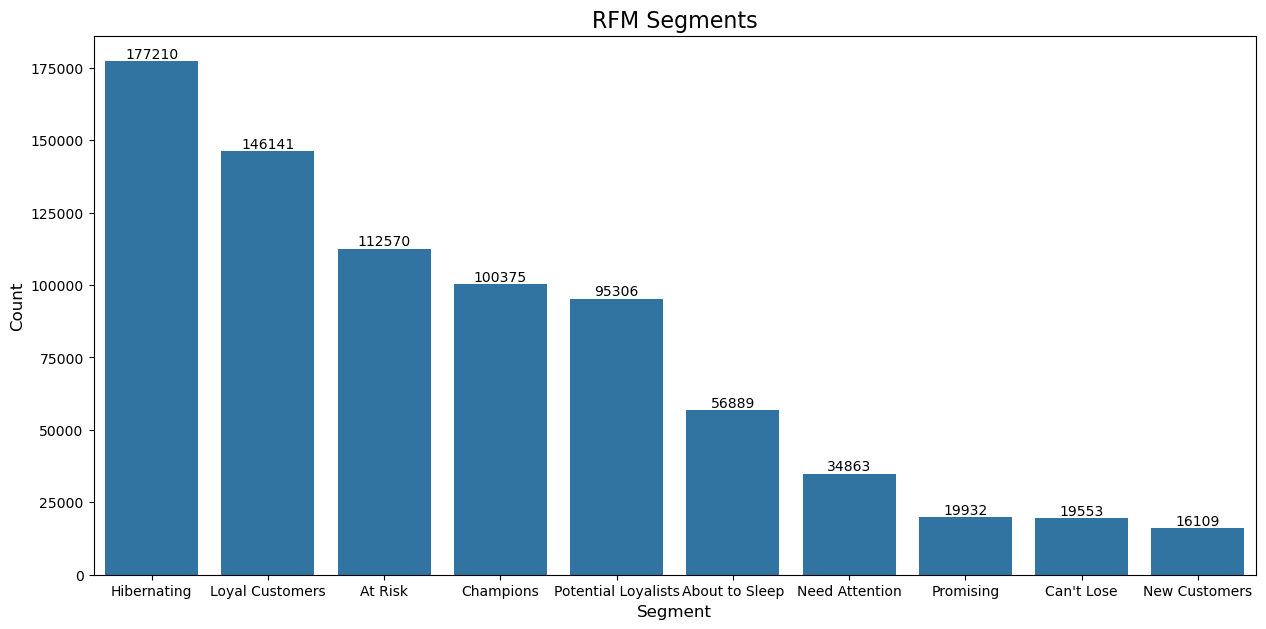

In [64]:
# RFM 세그먼트 값 계산
segment_counts = rfm['segment'].value_counts()

# 막대 그래프 생성
plt.figure(figsize=(15, 7))
sns.barplot(x=segment_counts.index, y=segment_counts.values)

plt.title('RFM Segments', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)

# 값 레이블 추가
for i in range(len(segment_counts)):
    plt.text(i, segment_counts.values[i], segment_counts.values[i], ha='center', va='bottom')

plt.show()

리소스의 한계로 거래 날짜를 제한하고, 앞서 분석한 RPM을 기준으로 데이터를 축소하였다.

In [65]:
transactions.head(1)

,InvoiceDate,customer_id,article_id,price,sales_channel_id,t_dat,date
22886405,2020-03-01,0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,751628002,0.022017,1,2020-03-01,2020-03-01


In [66]:
rfm.head(1)

,customer_id,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,18,6,0.144475,5,3,3,53,Potential Loyalists


In [67]:
transactions.head(1)

,InvoiceDate,customer_id,article_id,price,sales_channel_id,t_dat,date
22886405,2020-03-01,0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,751628002,0.022017,1,2020-03-01,2020-03-01


In [68]:
# 'transactions'과 'rfm'을 'customer_id'를 기준으로 병합 하여, 공통으로 존재하는 'customer_id'를 가진 데이터만 남김
transactions = pd.merge(transactions, rfm[["customer_id", "segment"]], how='inner', on='customer_id')

# 훈련에 사용할 고객 세그먼트를 정의
training_segment = ['Champions', 'Potential Loyalists', 'New Customers','Promising','Loyal Customers']
transactions = transactions[transactions['segment'].isin(training_segment)]

# 'segment' 열 삭제
transactions = transactions.drop('segment', axis=1)

In [69]:
transactions.head()

,InvoiceDate,customer_id,article_id,price,sales_channel_id,t_dat,date
0,2020-03-01,0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,751628002,0.022017,1,2020-03-01,2020-03-01
1,2020-04-22,0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,599580055,0.016932,2,2020-04-22,2020-04-22
2,2020-04-22,0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,811835004,0.030492,2,2020-04-22,2020-04-22
3,2020-04-22,0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,723529001,0.016932,2,2020-04-22,2020-04-22
4,2020-04-22,0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,559630026,0.025407,2,2020-04-22,2020-04-22


In [70]:
transactions.shape

(5992935, 7)

In [71]:
# 최근 날짜를 기준으로 데이터 필터링
start_date = datetime.datetime(2020,9,1)
transactions["t_dat"] = transactions["InvoiceDate"]
transactions = transactions.loc[transactions["InvoiceDate"] >= start_date]

In [72]:
transactions.shape

(727334, 7)

In [73]:
# 10회 이상 구매한 아티클 필터링
article_bought_count = transactions[['article_id', 'InvoiceDate']].groupby('article_id').count().reset_index().rename(columns={'InvoiceDate': 'count'})
most_bought_articles = article_bought_count[article_bought_count['count']>10]['article_id'].values
transactions = transactions[transactions['article_id'].isin(most_bought_articles)]
transactions["bought"]=1 

In [74]:
transactions.head()

,InvoiceDate,customer_id,article_id,price,sales_channel_id,t_dat,date,bought
27,2020-09-14,0008968c0d451dbc5a9968da03196fe20051965edde7413775c4eb3be9abe9c2,893059004,0.035576,2,2020-09-14,2020-09-14,1
50,2020-09-03,002611889659ab1051fc3e4e870f2b603c3aaa902ffe6ab59e83461c76c879dc,902802002,0.033881,2,2020-09-03,2020-09-03,1
51,2020-09-03,002611889659ab1051fc3e4e870f2b603c3aaa902ffe6ab59e83461c76c879dc,805000007,0.050831,2,2020-09-03,2020-09-03,1
52,2020-09-03,002611889659ab1051fc3e4e870f2b603c3aaa902ffe6ab59e83461c76c879dc,918292001,0.042356,2,2020-09-03,2020-09-03,1
53,2020-09-03,002611889659ab1051fc3e4e870f2b603c3aaa902ffe6ab59e83461c76c879dc,805000001,0.050831,2,2020-09-03,2020-09-03,1


In [75]:
transactions.shape

(671674, 8)

In [76]:
compression_opts = dict(method='zip', archive_name='./out.csv')

transactions.to_csv('./out.zip', index=False, compression=compression_opts) 

In [77]:
articles = pd.read_csv('./h-and-m-personalized-fashion-recommendations/articles.csv')
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulded, lightly padded cups that shape the bust and provide good support. Narrow adjustable shoulder straps and a narrow hook-and-eye fastening at the back. Without visible seams for greater comfort."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulded, lightly padded cups that shape the bust and provide good support. Narrow adjustable shoulder straps and a narrow hook-and-eye fastening at the back. Without visible seams for greater comfort."


In [78]:
# 이용하지 않을 데이터 삭제

articles.drop(columns=['product_code', 'prod_name', 'product_type_no', 'product_type_name',
                       'graphical_appearance_no', 'graphical_appearance_name', 'colour_group_code',
                       'colour_group_name','perceived_colour_value_id', 'perceived_colour_value_name',
                       'perceived_colour_master_id', 'perceived_colour_master_name', 'department_no', 
                       'department_name', 'index_code', 'index_name', 'index_group_no', 'section_no', 
                       'section_name', 'garment_group_no', 'detail_desc'], inplace= True)

In [79]:
articles.head()

,article_id,product_group_name,index_group_name,garment_group_name
0,108775015,Garment Upper body,Ladieswear,Jersey Basic
1,108775044,Garment Upper body,Ladieswear,Jersey Basic
2,108775051,Garment Upper body,Ladieswear,Jersey Basic
3,110065001,Underwear,Ladieswear,"Under-, Nightwear"
4,110065002,Underwear,Ladieswear,"Under-, Nightwear"


In [80]:
# null 값 check
articles.isnull().sum()

article_id            0
product_group_name    0
index_group_name      0
garment_group_name    0
dtype: int64

In [82]:
articles.head()

,article_id,product_group_name,index_group_name,garment_group_name
0,108775015,Garment Upper body,Ladieswear,Jersey Basic
1,108775044,Garment Upper body,Ladieswear,Jersey Basic
2,108775051,Garment Upper body,Ladieswear,Jersey Basic
3,110065001,Underwear,Ladieswear,"Under-, Nightwear"
4,110065002,Underwear,Ladieswear,"Under-, Nightwear"


In [83]:
compression_articles = dict(method='zip', archive_name='./out_content.csv')

articles.to_csv('./out_content.zip', index=False, compression=compression_articles) 